In [1]:
from IPython.display import display, HTML

display(HTML('<style>.output_scroll { height: 400px; overflow-y: scroll; }</style>'))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")

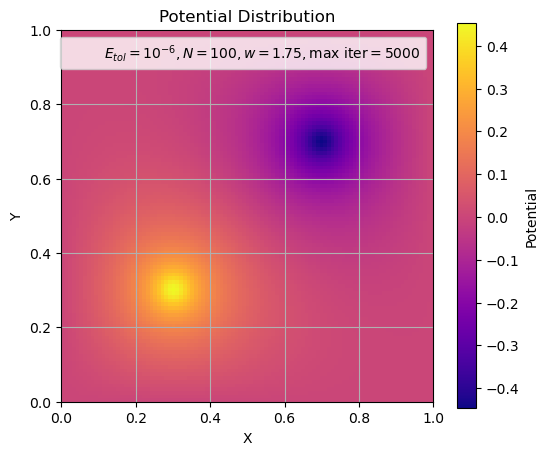

-0.40098071336057706


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.02): #mix,miy thesi fortiou SIGME EPIREAZEI E
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE(Etol=1e-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h*h * S[i, j])
                
        E1=0

        # Υπολογισμός του όρου του ηλεκτρικού πεδίου (με σωστά όρια)
        for i in range(1, N+1):  # Ξεκινάμε από 1 για να αποφύγουμε το i-1
            for j in range(1, N+1):  # Ξεκινάμε από 1 για να αποφύγουμε το j-1
                E1 += (pfilist[i][j] - pfilist[i-1][j])**2 + (pfilist[i][j] - pfilist[i][j-1])**2
        E2=0
        # Υπολογισμός του όρου της πηγής φορτίου
        for i in range(0,N):  # Από 0 έως N-1
            for j in range(0,N):  # Από 0 έως N-1
                E2 += S[i][j] * pfilist[i][j]
        
        # Συνολικός υπολογισμός της ενέργειας
        Etmp = (0.5 * E1) - (h**2 * E2)

        

        sfalma=np.abs(Etmp-E)
        E=Etmp

    return (pfilist, E, ite)

diagdata=convE()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(diagdata[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])

#plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar(im, label="Potential")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Potential Distribution")
dummy_plot = ax.plot([], [], ' ', label=r"$E_{tol}=10^{-6}, N=100, w=1.75, \mathrm{max\ iter}=5000$")
ax.legend(loc="upper right")

plt.grid(True)
plt.show()
print(diagdata[1])


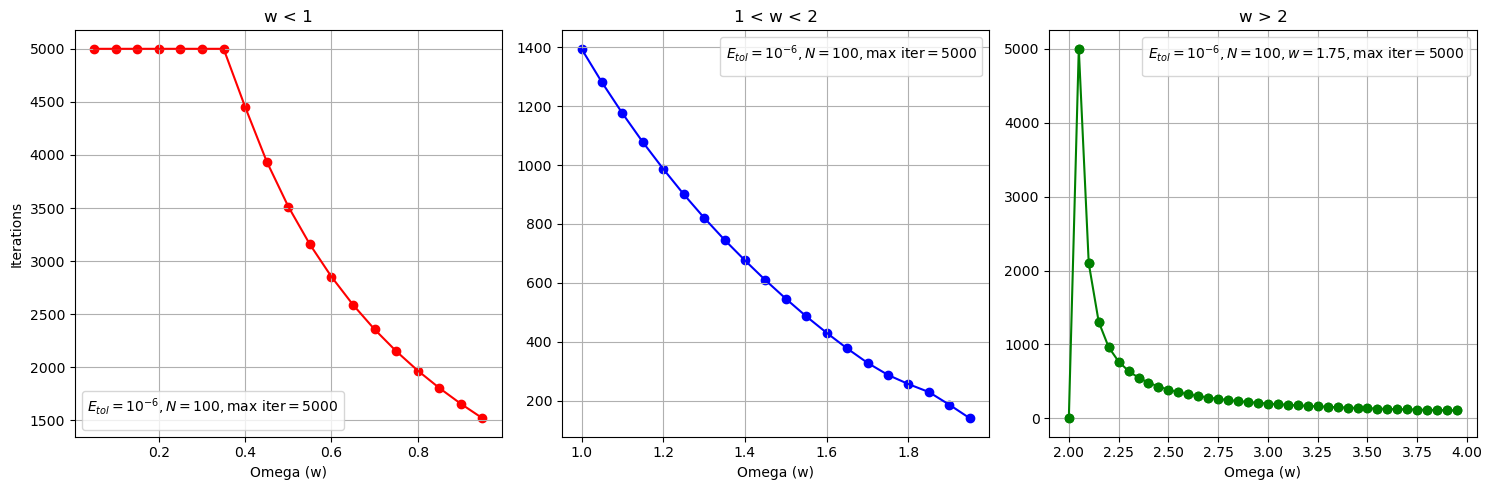

In [4]:
#now i wanna try different omegas and see convergence (iterations)

w1list=[]

iterlist1=[]
energylist1=[]

w2list=[]
w3list=[]

iterlist2=[]
energylist2=[]

iterlist3=[]
energylist3=[]

#af=apotelesma function

for w1 in np.arange(0.05, 1.00, 0.05):  # Δημιουργία τιμών από 1.0 έως 2.0
    af1 = convE(w=w1,Etol=10**-6,N=100,max_iter=5000)  # Κλήση της συνάρτησης synartisi
    w1list.append(w1)  # Προσθήκη του omega στη λίστα
    iterlist1.append(af1[2])  # Προσθήκη του πρώτου αποτελέσματος
    energylist1.append(af1[1]) 

for w2 in np.arange(1.00, 2.00, 0.05):  # Δημιουργία τιμών από 1.0 έως 2.0
    af2 = convE(w=w2,Etol=10**-6,N=100,max_iter=5000)  # Κλήση της συνάρτησης synartisi
    w2list.append(w2)  # Προσθήκη του omega στη λίστα
    iterlist2.append(af2[2])  # Προσθήκη του πρώτου αποτελέσματος
    energylist2.append(af2[1])

for w3 in np.arange(2.00, 4.00, 0.05):  # Δημιουργία τιμών από 1.0 έως 2.0
    af3 = convE(w=w3,Etol=10**-6,N=100,max_iter=5000)  # Κλήση της συνάρτησης synartisi
    w3list.append(w3)  # Προσθήκη του omega στη λίστα
    iterlist3.append(af3[2])  # Προσθήκη του πρώτου αποτελέσματοbς
    energylist3.append(af3[1]) 


fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 γραμμή, 3 στήλες
axes[0].plot(w1list,iterlist1, color='r')
axes[0].scatter(w1list, iterlist1, color='r')

axes[0].set_title("w < 1")
axes[0].set_xlabel("Omega (w)")

axes[0].set_ylabel("Iterations")

axes[0].grid(True)
axes[0].legend(title=r"$E_{tol}=10^{-6}, N=100, \mathrm{max\ iter}=5000$")



# Δεύτερο plot
axes[1].plot(w2list,iterlist2, color='b')
axes[1].scatter(w2list, iterlist2, color='b')

axes[1].set_title("1 < w < 2")
axes[1].set_xlabel("Omega (w)")

axes[1].grid(True)
axes[1].legend(title=r"$E_{tol}=10^{-6}, N=100, \mathrm{max\ iter}=5000$")

axes[2].plot(w3list, iterlist3, color='g', linestyle='-', marker='o')
axes[2].scatter(w3list, iterlist3, color='g')
axes[2].set_title("w > 2")
axes[2].set_xlabel("Omega (w)")
axes[2].grid(True)
axes[2].legend(title=r"$E_{tol}=10^{-6}, N=100, w=1.75, \mathrm{max\ iter}=5000$")

# Προσθήκη κενών μεταξύ των plots
plt.tight_layout()

# Εμφάνιση
plt.show()


#anamenomeni sumperifora sto omega=2
#prepei na to kanw kai gia mikroteres times tou omega!!!
#to kanw sto telos giati tha parei pollh wra na treksei

In [289]:
'''Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,
𝑁𝑥 = 𝑁𝑦 = 10, 100, 1000, etc. How does this affect the calculated energy
[see Eq. (7)].'''

'Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,\n𝑁𝑥 = 𝑁𝑦 = 10, 100, 1000, etc. How does this affect the calculated energy\n[see Eq. (7)].'

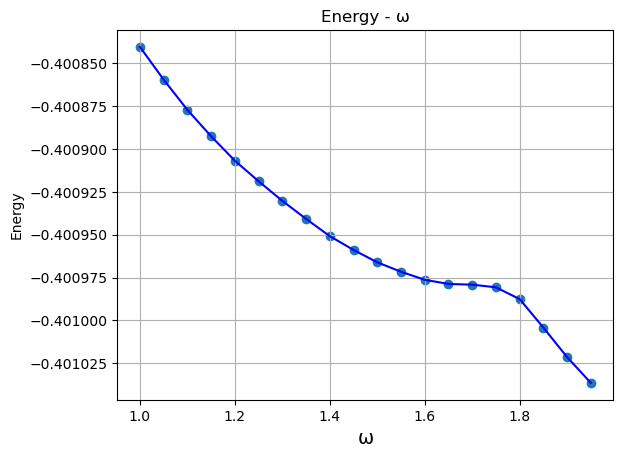

In [7]:
#energy-omega


plt.plot(w2list,energylist2,color='b')
plt.scatter(w2list,energylist2)
plt.xlabel("ω",size=14)
plt.ylabel("Energy")
plt.title("Energy - ω")
plt.grid()
plt.show()

In [8]:
print(energylist2) 

[-0.40084032941828307, -0.4008594603996652, -0.4008771010716189, -0.40089252534159414, -0.40090678509982897, -0.40091877685387917, -0.40093022691352553, -0.4009407515102262, -0.40095083771118045, -0.4009588803170814, -0.40096611144322536, -0.4009716358124677, -0.4009763131822759, -0.4009787519229384, -0.4009791602041731, -0.4009807133605772, -0.40098760359915675, -0.40100424370157545, -0.4010214850365657, -0.4010365433281421]


[-10.836071875657797, -0.4689242613039591, -0.4218907380770253, -0.409436664836772, -0.40310386042170665, -0.39927769463205165, -0.39671712199231585, -0.3948801216702335, -0.39349418726741, -0.3924094088808587]


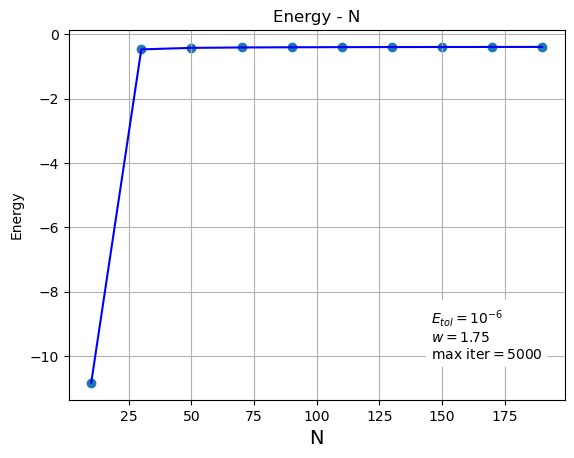

In [12]:
Nlist15=[]
energylist15=[]
#af=apotelesma function

for n in np.arange(10, 200, 20):  # Δημιουργία τιμών από 1.0 έως 2.0
    af15 = convE(N=n)  # Κλήση της συνάρτησης synartisi
    Nlist15.append(n)  # Προσθήκη του omega στη λίστα
    energylist15.append(af15[1]) 
print(energylist15)




plt.plot(Nlist15,energylist15,color='b')
plt.scatter(Nlist15,energylist15)
plt.xlabel("N",size=14)
plt.ylabel("Energy")
plt.title("Energy - N")

plt.text(0.73, 0.25, r"$E_{tol}=10^{-6}$" "\n" r"$w=1.75$" "\n" r"$\mathrm{max\ iter}=5000$", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"))


plt.grid()
plt.show()

In [ ]:
xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.02): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE2(Etol=10**-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    E=1 
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    X,Y=np.meshgrid(x,y)
    Elista=[]    

    x_thesi=np.arange(0,1.1,0.1)
    for i in x_thesi:
        pfilist = np.zeros((N+1, N+1))  # Reset το δυναμικό για κάθε νέα θέση φορτίου CHAT GPT!

        G1 = g2D(X, Y, i, 0.2)
        G2 = g2D(X, Y, i, 0.6)
        S = G1 - G2
        
        pfilist[0,:]=0
        pfilist[N,:]=0
        pfilist[:,0]=0
        pfilist[:,N]=0
        
        sfalma = 1 #CHAT
        E = 0 #CHAT
        ite = 0 #CHAT
        
        while sfalma>Etol and ite<max_iter:
            ite+=1        
            for i in range(1,N):  #N-1 eixa prin
                for j in range(1,N):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )
    
            E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
            E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
            Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)
    
            sfalma=np.abs(Etmp-E)
            E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi
        Elista.append(E)

    return (pfilist, E, Elista,x_thesi)

datamou=convE2()

plt.plot(datamou[3], datamou[2], marker='o',color='b')
plt.xlabel("Distance from the edge")
plt.ylabel("Energy")
plt.title("Energy vs Distance from the edge")
plt.grid()
plt.show() # δεν ειμαι καθολου σιγουρη αν τα νουμερα για την ενεργεια ειναι τα αναμενομενα

'''Create a Faraday cage in the cell. Is the calculated potential physically
meaningful?'''

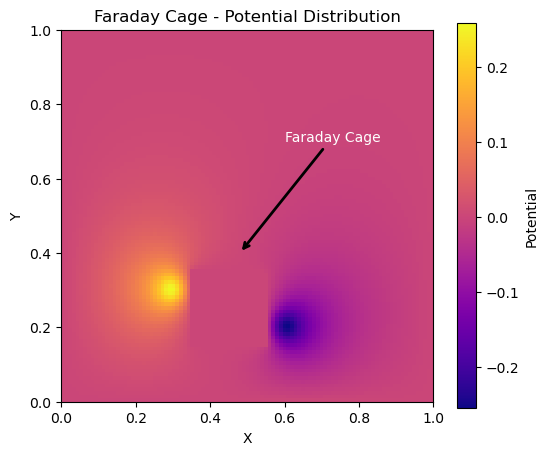

In [255]:
import numpy as np
import matplotlib.pyplot as plt

def FaradayCage(Etol=10**-6, N=100, w=1.75, max_iter=5000):
    auxMat = np.ones((N+1, N+1))  # Τώρα είναι 2D
    auxMat[0, :] = 0
    auxMat[N, :] = 0
    auxMat[:, 0] = 0
    auxMat[:, N] = 0

    sfalma = 1
    ite = 0
    xmin, ymin = 0, 0
    xmax, ymax = 1, 1
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    X, Y = np.meshgrid(x, y)

    # Φορτίο Διπόλου
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.2, 0.6)
    S = G1 - G2

    # Ορισμός συνόρων (κλουβί Faraday)
    pfilist = np.zeros((N+1, N+1))
# Καθορισμός των ορίων του κλουβιού Faraday
    pfilist[30:41, 20] = 0  # Κάθετο τοίχωμα αριστερά
    pfilist[30:41, 80] = 0  # Κάθετο τοίχωμα δεξιά
    pfilist[30, 20:80] = 0  # Οριζόντιο τοίχωμα πάνω
    pfilist[40, 20:80] = 0 
    # Οριζόντιο τοίχωμα κάτω
    auxMat[35:55, 15] = 0
    auxMat[35:55, 35] = 0
    auxMat[35, 15:35] = 0
    auxMat[55, 15:35] = 0


    
    while sfalma > Etol and ite < max_iter:
        ite += 1
                
        for i in range(1, N):  
            for j in range(1, N):
                if auxMat[i, j] != 0:  # Διορθωμένη συνθήκη
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )

        # Υπολογισμός ενέργειας
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(E - Etmp)
        E = Etmp

    return pfilist, E, ite


# Εκτελείς τη FaradayCage()
faraday_data = FaradayCage()
potential_grid = faraday_data[0]

# Σχεδίαση του imshow διαγράμματος
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(potential_grid.T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im, label="Potential")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Faraday Cage - Potential Distribution")

cage_x, cage_y = 0.48, 0.4  # Τοποθεσία του κλουβιού Faraday

ax.annotate("Faraday Cage",  
            xy=(cage_x, cage_y),  # Σημείο που θα δείχνει το βέλος
            xytext=(0.6, 0.7),  # Σημείο που θα εμφανίζεται η ετικέτα
            arrowprops=dict(facecolor='white', edgecolor='black', arrowstyle='->', linewidth=2),
            fontsize=10, color='white')
plt.show()

'''can you create a capacitor?''' Στον αρχικο μου κωδικα αντι για δυο σημειακα φορτια (διπολο) θα εχω δυο παραλληλες πλακες αντιθετου δυναμικου

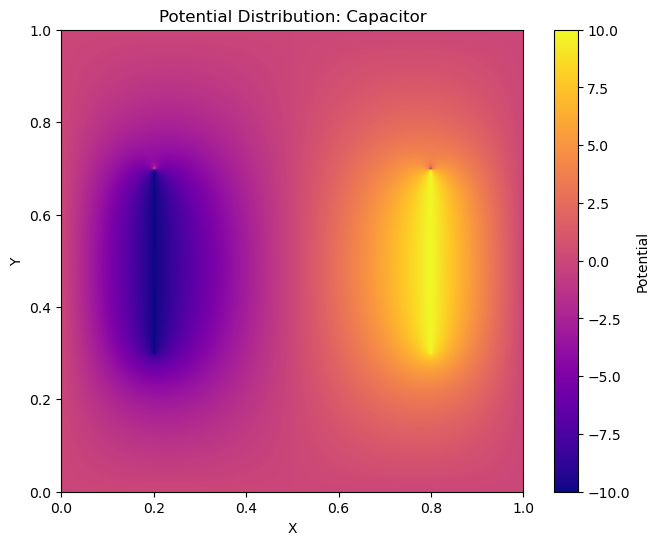

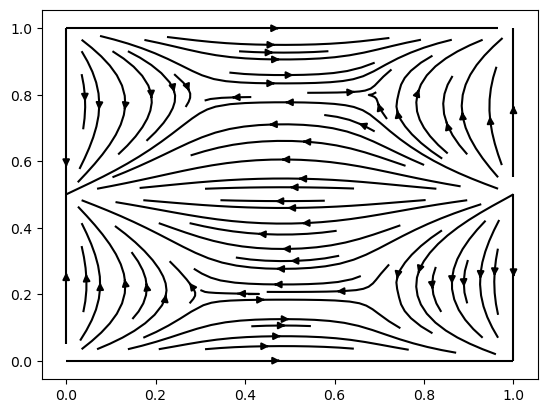

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Ορισμός του πλέγματος και του χώρου
xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 200  # Πλέγμα 100x100
h = (xmax - xmin) / (N - 1)  # Βήμα του πλέγματος


def convE_capacitor(Etol=1e-6, N=200, w=1.75, max_iter=20000):
    ite = 0
    h = (xmax - xmin) / (N - 1)  # Βήμα του πλέγματος
    sfalma = 1  # Αρχικό σφάλμα (για την σύγκλιση)
    E = 0  # Αρχική ενέργεια

    # Ορισμός του πλέγματος
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))  # Πίνακας ηλεκτρικού δυναμικού

    ################################################################################
    V0 = 10  # Τάση μεταξύ των πλακών
    plate_width = int(N * 0.4)  # Το πλάτος των πλακών είναι το 80% του πλέγματος

    # Καθορισμός θέσης των πλακών
    top_plate_y = int(0.8 * N)  # Άνω πλάκα στη γραμμή 80 (για Ν=100)
    bottom_plate_y = int(0.2 * N)  # Κάτω πλάκα στη γραμμή 20 (για Ν=100)
    
    # Τοποθέτηση των πλακών στο πλέγμα με σταθερό δυναμικό
    start_x = (N - plate_width) // 2  # Αρχή πλάκας - // ακεραια διαιρεση
    end_x = (N + plate_width) // 2  # Τέλος πλάκας
    
    # Άνω πλάκα (+V0)
    pfilist[top_plate_y, start_x:end_x] = V0
    
    # Κάτω πλάκα (-V0)
    pfilist[bottom_plate_y, start_x:end_x] = -V0

    pfilist[0,] = 0 #dirichlet
    pfilist[-1,:] = 0
    pfilist[:,0] = 0
    pfilist[:,-1] = 0
    
    ##############################################################################
    
    while sfalma > Etol and ite < max_iter:
        ite += 1

        for i in range(1, N):
            for j in range(1, N):
                # Εξαιρούμε τα σημεία των πλακών
                if not ((int(0.8*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2) or
                        (int(0.2*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2)):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i+1, j] + pfilist[i-1, j] +
                        pfilist[i, j+1] + pfilist[i, j-1]
                    )
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :]) ** 2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1]) ** 2)
        Etmp = 0.5 * (E1 + E2)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite

potential, energy, iterations = convE_capacitor()

plt.figure(figsize=(8, 6))
plt.imshow(potential.T, cmap='plasma', origin='lower', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label="Potential")
plt.title("Potential Distribution: Capacitor")
plt.xlabel("X")
plt.ylabel("Y")
plt.show() #as sxediasw kai to hlektrko pedio 

Ex, Ey = np.gradient(-potential, h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')




• Implement Neumann and Periodic Boundary conditions. 


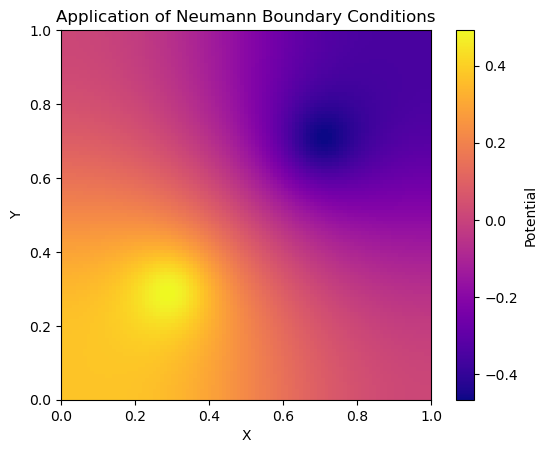

In [259]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Μέγεθος πλέγματος

def g2D(x, y, qx, qy, sigma=0.05):
    """ Δημιουργεί μια Gaussian κατανομή φορτίου. """
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e)) / (2 * np.pi * sigma**2)

def convE_Neumann(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    """ Επιλύει την εξίσωση Poisson με Neumann οριακές συνθήκες. """
    sfalma = 1
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας

    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2  # Συνάρτηση πηγής

    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(1, N):  
            for j in range(1, N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i+1, j] + pfilist[i-1, j] +
                    pfilist[i, j+1] + pfilist[i, j-1] + h**2 * S[i, j]
                )

        # ** Neumann Boundary Conditions (κάθε επανάληψη) **
        pfilist[0, :] = pfilist[1, :]   # Κάτω όριο
        pfilist[N, :] = pfilist[N-1, :] # Πάνω όριο
        pfilist[:, 0] = pfilist[:, 1]   # Αριστερό όριο
        pfilist[:, N] = pfilist[:, N-1] # Δεξί όριο

        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite

# ** Εκτέλεση της επίλυσης **
diagdata = convE_Neumann()

# ** Οπτικοποίηση του δυναμικού **
im42=plt.imshow(diagdata[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im42, label="Potential")

plt.title("Application of Neumann Boundary Conditions")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()


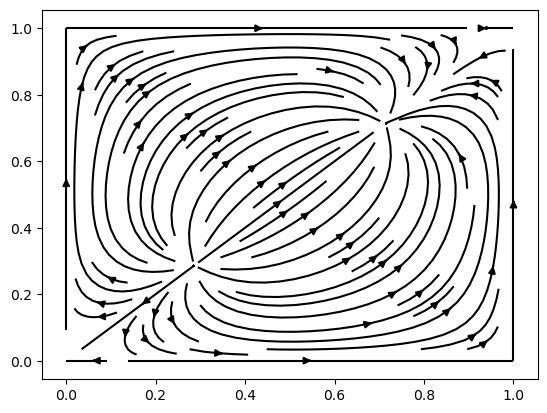

In [260]:

Ey, Ex = np.gradient(-diagdata[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')

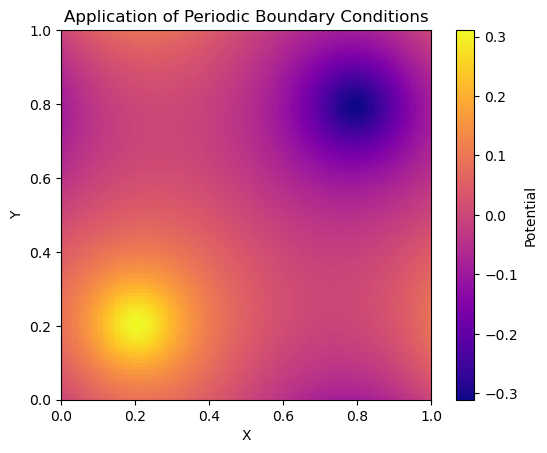

In [261]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Μέγεθος πλέγματος

def per(i, N):
    if i < 0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def convE_periodic(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας
    sfalma = 1

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    pfilist = np.zeros((N, N))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.2, 0.2)
    G2 = g2D(X, Y, 0.8, 0.8)
    S = G1 - G2  # Συνάρτηση πηγής

    # ** Επαναληπτική διαδικασία Successive Over-Relaxation (SOR) **
    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(N):  
            for j in range(N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[per(i + 1, N), j] + pfilist[per(i - 1, N), j] +
                    pfilist[i, per(j + 1, N)] + pfilist[i, per(j - 1, N)] + h ** 2 * S[i, j]
                )

        # Υπολογισμός ενέργειας
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite
diagdataper = convE_periodic()

# ** Οπτικοποίηση του δυναμικού **
im44=plt.imshow(diagdataper[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im44, label="Potential")
plt.title("Application of Periodic Boundary Conditions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Calculate the potential arising from a dipole with its center of mass placed
at the center of the cell. What differences do you observe in the calculated
potential? Can you explain? (hint: it may be helpful to calculate and
visualize the corresponding vector field).

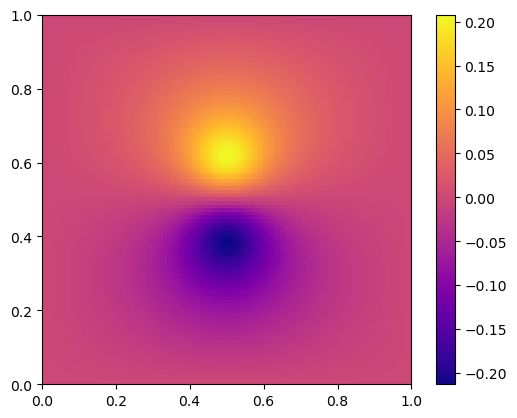

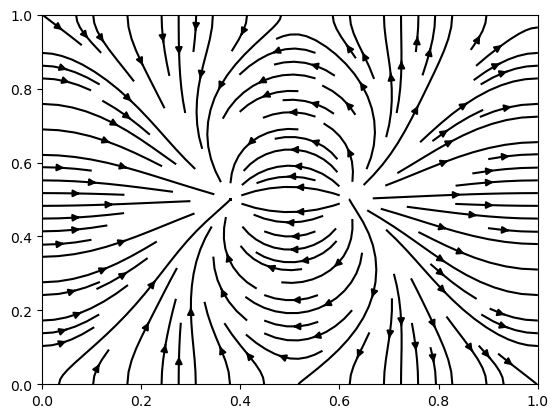

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE_CM(Etol=10**-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.6, 0.5)
    G2 = g2D(X, Y, 0.4, 0.5)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata=convE_CM()
plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar()
plt.show()
#den katalavainw ti paizei kai poly


Ey, Ex = np.gradient(-diagdata[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')

If, instead of a dipole, try to solve the Poisson's equation with a single
charge (i.e., the system is not charge neutral) and periodic boundary
conditions. What do you observe? Can you explain?

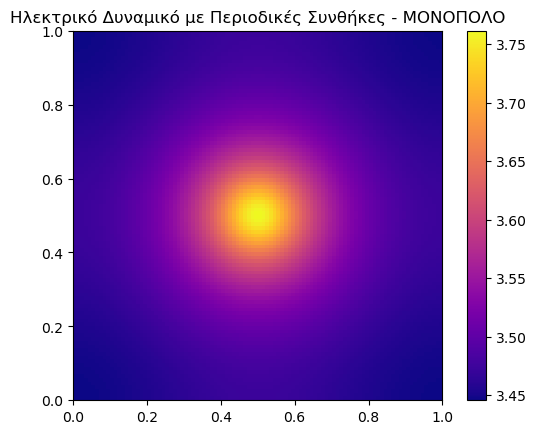

In [263]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Μέγεθος πλέγματος

def per(i, N):
    if i < 0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def convE_periodicMONOPOLO(Etol=1e-6, N=100, w=1.75, max_iter=10000):
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας
    sfalma = 1

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    pfilist = np.zeros((N, N))
    X, Y = np.meshgrid(x, y)

    S = g2D(X, Y, 0.5, 0.5)

    # ** Επαναληπτική διαδικασία Successive Over-Relaxation (SOR) **
    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(N):  
            for j in range(N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[per(i + 1, N), j] + pfilist[per(i - 1, N), j] +
                    pfilist[i, per(j + 1, N)] + pfilist[i, per(j - 1, N)] + h ** 2 * S[i, j]
                )

        # Υπολογισμός ενέργειας
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite
diagdataperMONO = convE_periodicMONOPOLO()

# ** Οπτικοποίηση του δυναμικού **
plt.imshow(diagdataperMONO[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("Ηλεκτρικό Δυναμικό με Περιοδικές Συνθήκες - ΜΟΝΟΠΟΛΟ")
plt.show()

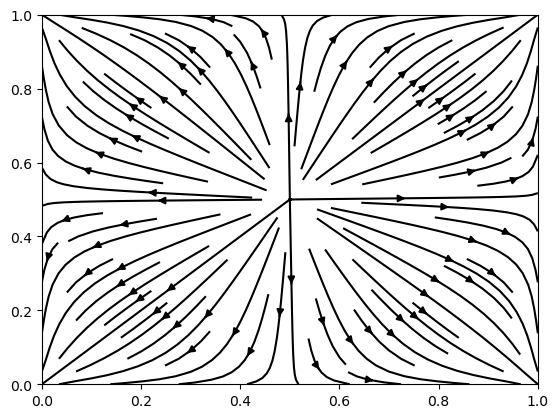

In [264]:

Ey, Ex = np.gradient(-diagdataperMONO[0], h)
plt.streamplot(np.linspace(0, 1, N), np.linspace(0, 1, N), Ex, Ey, color='black')

If we attempt to solve Poisson’s equation with a single point charge (i.e., a non-neutral system) while using periodic boundary conditions (PBC), we will observe unexpected and unphysical results.

📌 What Do We Observe?
🔴 The solver struggles to converge

The potential will not stabilize properly.
🔴 The potential is not physical

Because the single charge gets infinitely repeated across periodic boundaries, the system has infinite charge.
🔴 The electric field does not behave normally

Instead of field lines spreading out as in free space, they wrap around the domain in an unphysical way.


- why is this considered abnormal?
- The electric field pattern in the image is abnormal because it is inconsistent with the expected behavior of a single isolated charge in free space. Here’s why:

🔹 Expected Behavior of a Single Charge
If you place a single charge in an open domain (non-periodic boundaries):

The electric field should radiate outward symmetrically (for a positive charge) or converge inward (for a negative charge).
The field lines should extend infinitely without looping back.
1️⃣ Periodic Boundary Conditions Create an Infinite Grid of Charges

In a periodic system, the single charge is repeated infinitely in all directions.
This means the system is not a single charge anymore but an infinite lattice of charges.
The field now behaves as if there are infinite positive charges periodically placed in the domain.
2️⃣ Formation of an Unphysical Dipole-like Structure

The field lines do not radiate outward from a single point.
Instead, they bend and meet at the center, resembling a dipole or quadrupole rather than a single monopole.
3️⃣ No Charge Neutrality → Divergence Issues

Physically, periodic systems must be charge-neutral to have a well-defined solution.
Without a compensating background charge, the potential diverges, leading to an artificial distortion in the electric field.
4️⃣ Artificial Symmetry Due to Periodicity

The image shows an unexpected mirror symmetry along the centerlines.
This happens because the solver is effectively solving for multiple interacting charges rather than one.

Place the center of mass of the dipole at the center of the cell. Keeping the
center of mass fixed, change the distance between the two charges.
Calculate the energy vs the distance between the two charges (use
Dirichlet, Neumann, and periodic boundary conditions). Are the results you
get physically meaningful? Can you explain?

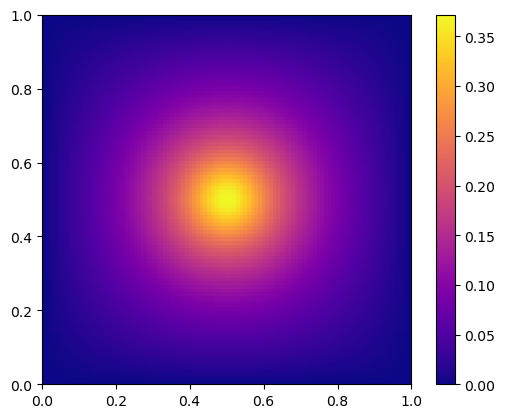

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100
h=(xmax-xmin)/(N-1)


def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convEM2(Etol=10**-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G = g2D(X, Y, 0.5, 0.5)
    S = G
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata22=convEM2()
plt.imshow(diagdata22[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar()
plt.show()

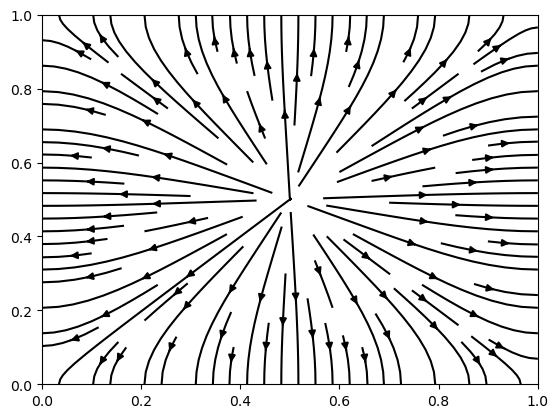

In [266]:
Ey, Ex = np.gradient(-diagdata22[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')

Place the center of mass of the dipole at the center of the cell. Keeping the
center of mass fixed, change the distance between the two charges.
Calculate the energy vs the distance between the two charges (use
Dirichlet, Neumann, and periodic boundary conditions). Are the results you
get physically meaningful? Can you explain?